In [193]:
import pandas as pd
import numpy as np

train = pd.read_csv('../data/raw/train.csv')
train.head()

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
0,1,FOLD,PICKUP TRUCK - STANDARD,3.5,6.0,A6,X,8.64 liters per 100 km,6.14 L/100 km,37.59 mpg Imp.,306.0
1,2,CHEVO,PICKUP TRUCK - STANDARD,5.3,NaN,A6,E,27.27 liters per 100 km,30.76 liters per 100 km,28.84 L/100 km,283.0
2,3,BMV,SUBCOMPACT,4.4,NaN,M6,Z,0.17 L/10km,2.03 liters per 100 km,zero,329.0
3,4,KIO,SUV - SMALL,NaN,4.0,AS6,X,6.52 km per L,1.59 L/10km,NaN,270.0
4,5,BARUSU,MINICOMPACT,3.0,6.0,unspecified,Z,20.15 L/100km,0.60 L/10km,1.38 L/10km,193.0


In [194]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137141 entries, 0 to 137140
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Id                     137141 non-null  int64  
 1   Make                   137141 non-null  object 
 2   Vehicle Class          135816 non-null  object 
 3   Engine Size(L)         120522 non-null  object 
 4   Cylinders              122986 non-null  object 
 5   Transmission           134536 non-null  object 
 6   Fuel Type              135286 non-null  object 
 7   Fuel Consumption City  134719 non-null  object 
 8   Fuel Consumption Hwy   134573 non-null  object 
 9   Fuel Consumption Comb  134559 non-null  object 
 10  CO2 Emissions(g/km)    137141 non-null  float64
dtypes: float64(1), int64(1), object(9)
memory usage: 11.5+ MB


In [195]:
train.shape

(137141, 11)

In [196]:
train.describe()

,Id,CO2 Emissions(g/km)
count,137141.000000,137141.000000
mean,68571.000000,250.471627
std,39589.340971,76.956554
min,1.000000,96.000000
25%,34286.000000,201.000000
50%,68571.000000,234.000000
75%,102856.000000,291.000000
max,137141.000000,822.111635


In [197]:
train.isnull().sum()

Id                           0
Make                         0
Vehicle Class             1325
Engine Size(L)           16619
Cylinders                14155
Transmission              2605
Fuel Type                 1855
Fuel Consumption City     2422
Fuel Consumption Hwy      2568
Fuel Consumption Comb     2582
CO2 Emissions(g/km)          0
dtype: int64

In [198]:
train_no_fuel = train.drop(['Fuel Consumption City', 'Fuel Consumption Hwy', 'Fuel Consumption Comb', 'Id', 'CO2 Emissions(g/km)'], axis=1)
unique_values = {col: train_no_fuel[col].unique() for col in train_no_fuel.columns}
for col, unique_val in unique_values.items():
    print(f'{col}: {len(unique_val)}')
    print(unique_val)
    print('\n')

Make: 21
['FOLD' 'CHEVO' 'BMV' 'KIO' 'BARUSU' 'LECUS' 'GONDA' 'LAND CRAWLER'
 'FOLKSWA' 'TOYOTI' 'JIPU' 'TOLVO' 'ASURA' 'NIRRAN' 'FIAR' 'DOGE'
 'CADILUXE' 'MATSUDA' 'MITSU' 'RYUNDAI' 'LAMBOGI']


Vehicle Class: 25
['PICKUP TRUCK - STANDARD' 'SUBCOMPACT' 'SUV - SMALL' 'MINICOMPACT'
 'COMPACT' 'FULL-SIZE' 'SUV - STANDARD' 'MINIVAN' 'STATION WAGON - SMALL'
 nan 'PICKUP TRUCK - SMALL' 'missing' 'TWO-SEATER'
 'STATION WAGON - MID-SIZE' 'MID-SIZE' 'SPECIAL PURPOSE VEHICLE'
 'VAN - PASSENGER' '-1' 'not-recorded' 'na' 'unspecified' 'unknown'
 'unestablished' 'VAN - CARGO' 'not-available']


Engine Size(L): 51
['3.5' '5.3' '4.4' nan '3.0' 'unspecified' '1.8' '2.0' '3.6' '2.5'
 'missing' '2.4' '2.3' '1.4' '1.6' '5.0' 'na' '1.3' '6.2' '4.8' '2.7'
 '6.0' '3.2' '6.5' '5.7' '3.7' '1.2' '4.0' '3.3' '1.5' 'not-available'
 '5.2' 'not-recorded' '3.8' '2.8' '-1' 'unknown' 'unestablished' '4.6'
 '6.4' '4.3' '6.6' '5.4' '1.0' '5.6' '5.8' '8.4' '3.4' '4.2' '6.8' '2.2']


Cylinders: 16
['6.0' nan '4.0' '8.0'

Replace missing value menjadi NaN

In [199]:
def similarize_missing_values(df):
    missing_values = ['missing', '-1', 'not-recorded', 'na', 'unspecified', 'unknown', 'unestablished', 'not-available']
    # cleaned_cols = ['Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type']
    
    df_new = df.copy()
    for col in df_new.columns:
        df_new[col] = df_new[col].replace(missing_values, np.nan)
        
    return df_new

train_similarized = similarize_missing_values(train)

<Axes: >

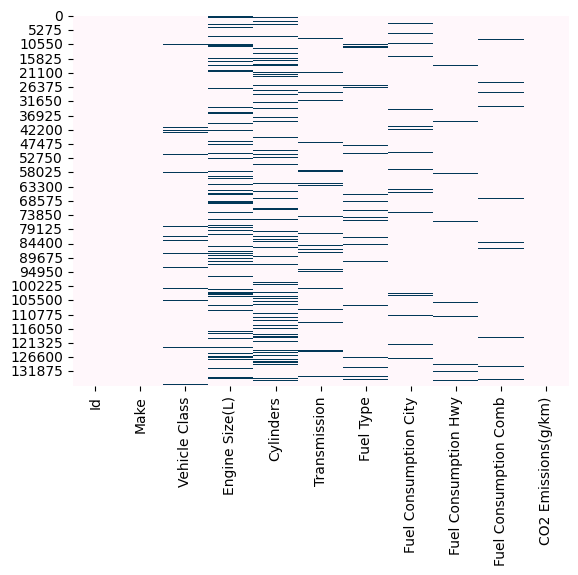

In [200]:
import seaborn as sns
sns.heatmap(train_similarized.isnull(), cbar=False, cmap='PuBu')

In [201]:
sum_null = train_similarized.isnull().sum()
count_null = train_similarized.isnull().count()

total = sum_null.sort_values(ascending=False)
percent = sum_null/count_null.sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(10)

,Total,Percent
Engine Size(L),24333,0.177431
Cylinders,20605,0.150247
Transmission,10440,0.076126
Fuel Type,7419,0.054098
Vehicle Class,5132,0.037421
Fuel Consumption Comb,3914,0.028540
Fuel Consumption Hwy,3859,0.028139
Fuel Consumption City,3650,0.026615
Id,0,0.000000
Make,0,0.000000


Make
FOLD            0.131842
CHEVO           0.121153
BMV             0.108881
TOYOTI          0.069724
NIRRAN          0.053135
JIPU            0.052807
DOGE            0.050656
KIO             0.046981
GONDA           0.044006
RYUNDAI         0.043204
FOLKSWA         0.039244
LECUS           0.037706
MATSUDA         0.036838
CADILUXE        0.032937
BARUSU          0.029036
TOLVO           0.026214
MITSU           0.019695
LAND CRAWLER    0.017901
ASURA           0.014875
FIAR            0.014671
LAMBOGI         0.008495
Name: proportion, dtype: float64


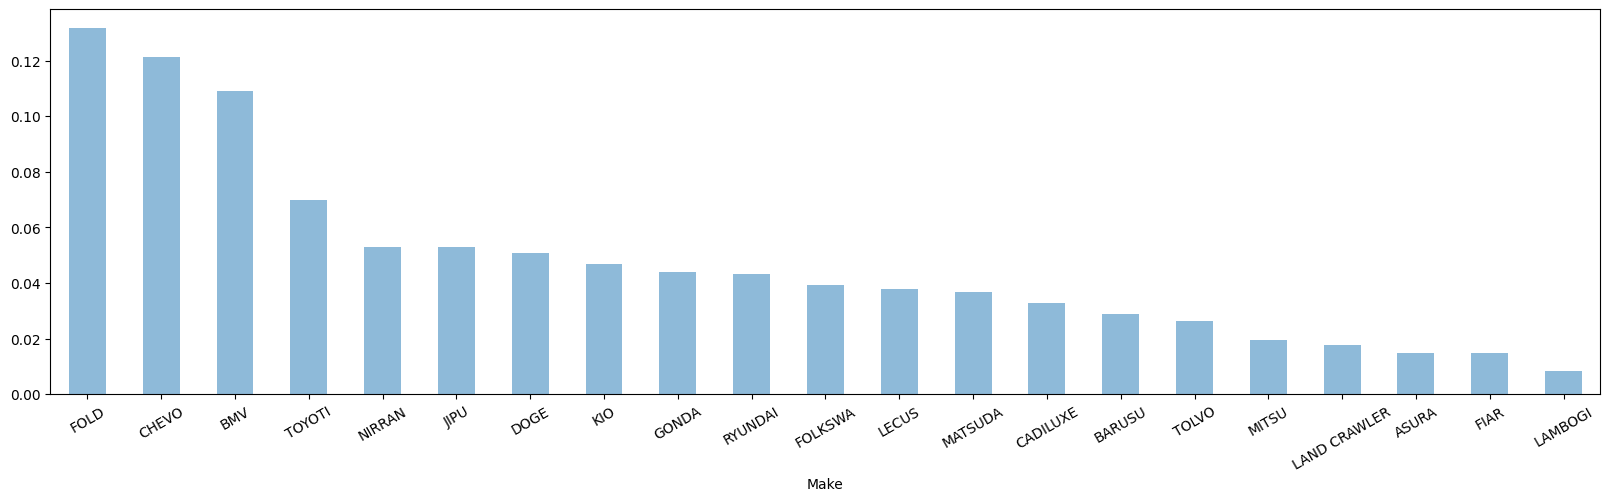

In [202]:
import matplotlib.pyplot as plt

norm = train_similarized['Make'].dropna().value_counts(normalize=True)
print(norm)

plt.figure(figsize=(20, 5))
norm.plot(kind='bar', alpha=0.5, rot=0)
plt.xticks(rotation=30)
plt.show()

Transmission
AS6     0.228301
AS8     0.157970
M6      0.141159
A6      0.097292
AV      0.059305
A8      0.053125
M5      0.037963
AS10    0.034435
A9      0.028050
AM7     0.027900
AV6     0.023851
AV7     0.021949
AM6     0.019290
A5      0.016472
AS9     0.013165
A4      0.010466
AV8     0.006890
AS7     0.005730
AS5     0.005533
A10     0.003062
AM8     0.002668
AV10    0.002328
M7      0.002273
AM9     0.000600
A7      0.000221
Name: proportion, dtype: float64


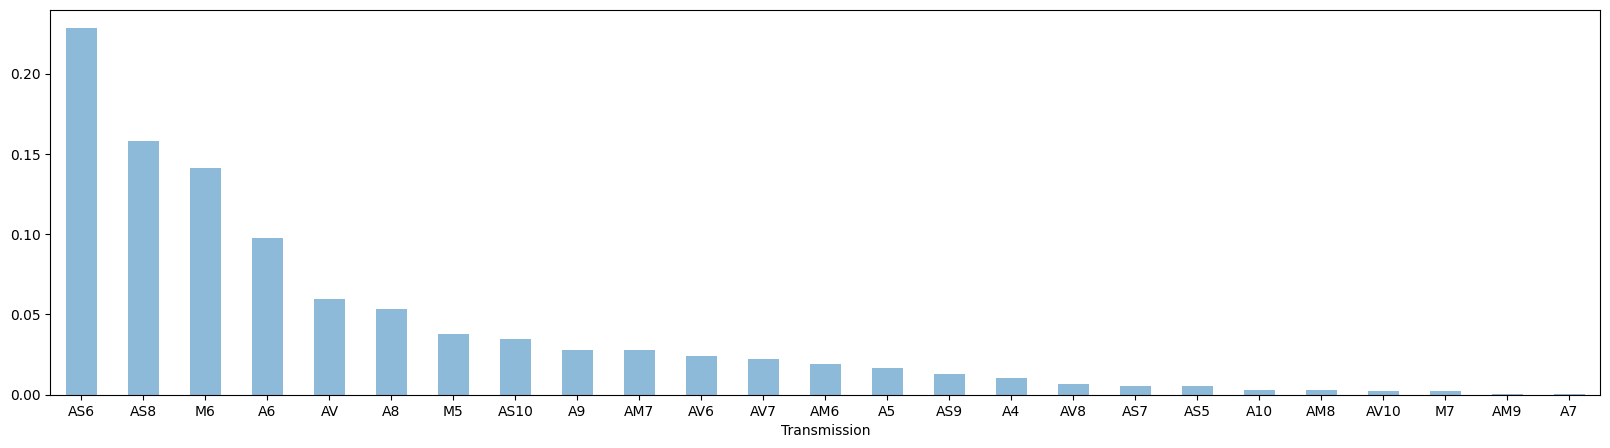

In [203]:
norm = train_similarized['Transmission'].dropna().value_counts(normalize=True)
print(norm)

plt.figure(figsize=(20, 5))
norm.plot(kind='bar', alpha=0.5, rot=0)
plt.show()

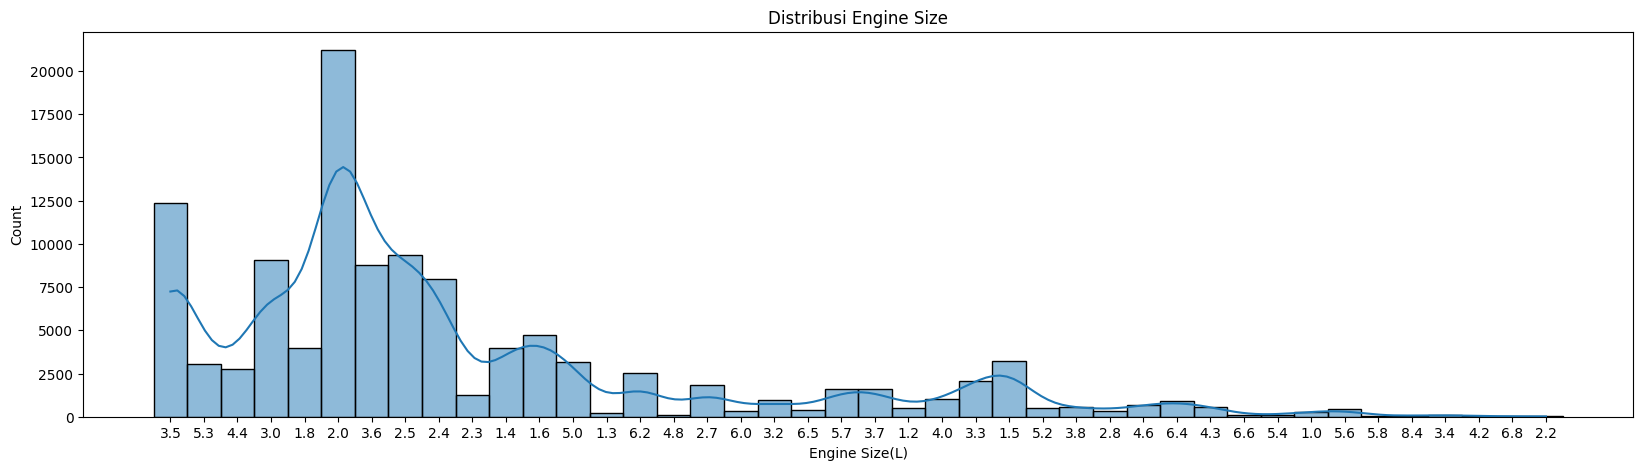

In [204]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
sns.histplot(train_similarized['Engine Size(L)'].dropna(), kde=True)
plt.title('Distribusi Engine Size')
plt.show()

Distribusi data skewed ke kiri

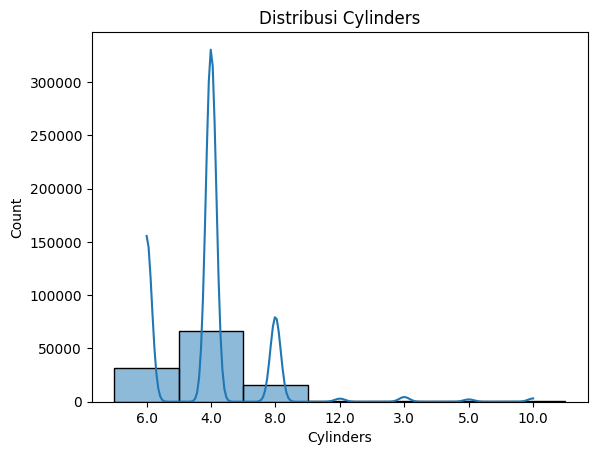

In [205]:
sns.histplot(train_similarized['Cylinders'].dropna(), kde=True)
plt.title('Distribusi Cylinders')
plt.show()

In [206]:
train_similarized.isnull().sum()

Id                           0
Make                         0
Vehicle Class             5132
Engine Size(L)           24333
Cylinders                20605
Transmission             10440
Fuel Type                 7419
Fuel Consumption City     3650
Fuel Consumption Hwy      3859
Fuel Consumption Comb     3914
CO2 Emissions(g/km)          0
dtype: int64

In [207]:
# Split the column into 'Number' and 'Unit' based on the pattern
def split_number_unit(df):
    train_fuel_city = df['Fuel Consumption City'].str.extract(r'(?P<number>[\d.]+)\s*(?P<unit>.*)')
    train_fuel_city['number'] = pd.to_numeric(train_fuel_city['number'], errors='coerce')

    train_fuel_Hwy = df['Fuel Consumption Hwy'].str.extract(r'(?P<number>[\d.]+)\s*(?P<unit>.*)')
    train_fuel_Hwy['number'] = pd.to_numeric(train_fuel_Hwy['number'], errors='coerce')

    train_fuel_Comb = df['Fuel Consumption Comb'].str.extract(r'(?P<number>[\d.]+)\s*(?P<unit>.*)')
    train_fuel_Comb['number'] = pd.to_numeric(train_fuel_Comb['number'], errors='coerce')
    
    return train_fuel_city, train_fuel_Hwy, train_fuel_Comb


train_fuel_city, train_fuel_Hwy, train_fuel_Comb = split_number_unit(train_similarized)

print(f'Fuel City: {train_fuel_city.unit.unique()}')
print(f'Fuel Hwy: {train_fuel_Hwy.unit.unique()}')
print(f'Fuel Comb: {train_fuel_Comb.unit.unique()}')

Fuel City: ['liters per 100 km' 'L/10km' 'km per L' 'L/100km' 'MPG (AS)' 'mpg Imp.'
 nan 'L/100 km' 'km/L' '']
Fuel Hwy: ['L/100 km' 'liters per 100 km' 'L/10km' 'mpg Imp.' 'L/100km' 'km per L'
 nan 'km/L' 'MPG (AS)' '']
Fuel Comb: ['mpg Imp.' 'L/100 km' nan 'L/10km' 'MPG (AS)' 'km/L' 'L/100km' ''
 'km per L' 'liters per 100 km']


In [208]:
def calc_conversion(row):
    convert_factors = {
        'km/L': 100, 
        'km per L': 100,
        'mpg Imp.': 282.480936,
        'MPG (AS)': 235.215, 
        'liters per 100 km': 1,
        'L/100 km': 1,
        'L/100km': 1,
        'L/10km': 10
    }
    
    conversion_factor = convert_factors.get(row['unit'], np.nan)
    number = row['number']

    # Check if the denominator is not zero before performing the division
    result = np.nan
    if conversion_factor != np.nan and number != 0:
        if conversion_factor in ['L/10km', 'L/100km', 'L/100 km', 'liters per 100 km']:
            result = number * conversion_factor
        else:
            result = conversion_factor / number
            
    return result


# Convert nilai berdasarkan tipe unit
def convert_fuel_consumption(df, city, hwy, comb):
    df['Fuel Consumption City (l/100km)'] = city.apply(calc_conversion, axis=1)
    df.drop(columns=['Fuel Consumption City'], inplace=True)

    df['Fuel Consumption Hwy (l/100km)'] = hwy.apply(calc_conversion, axis=1)
    df.drop(columns=['Fuel Consumption Hwy'], inplace=True)

    df['Fuel Consumption Comb (l/100km)'] = comb.apply(calc_conversion, axis=1)
    df.drop(columns=['Fuel Consumption Comb'], inplace=True)
    
    return df


train_converted = convert_fuel_consumption(train_similarized, train_fuel_city, train_fuel_Hwy, train_fuel_Comb)

In [209]:
train_converted.dtypes

Id                                   int64
Make                                object
Vehicle Class                       object
Engine Size(L)                      object
Cylinders                           object
Transmission                        object
Fuel Type                           object
CO2 Emissions(g/km)                float64
Fuel Consumption City (l/100km)    float64
Fuel Consumption Hwy (l/100km)     float64
Fuel Consumption Comb (l/100km)    float64
dtype: object

In [210]:
# Fill missing value fuel columns dengan nilai mean
def fill_missval_fuel(df):
    df['Fuel Consumption City (l/100km)'].fillna(df['Fuel Consumption City (l/100km)'].mean(), inplace=True)
    df['Fuel Consumption Hwy (l/100km)'].fillna(df['Fuel Consumption Hwy (l/100km)'].mean(), inplace=True)
    df['Fuel Consumption Comb (l/100km)'].fillna(df['Fuel Consumption Comb (l/100km)'].mean(), inplace=True)
    
    return df

train_cleaned = fill_missval_fuel(train_converted)
train_cleaned.isnull().sum()

Id                                     0
Make                                   0
Vehicle Class                       5132
Engine Size(L)                     24333
Cylinders                          20605
Transmission                       10440
Fuel Type                           7419
CO2 Emissions(g/km)                    0
Fuel Consumption City (l/100km)        0
Fuel Consumption Hwy (l/100km)         0
Fuel Consumption Comb (l/100km)        0
dtype: int64

Predict missing value menggunakan Random Forest untuk mengisi data

In [237]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_dist(df_col):
    plt.figure(figsize=(20, 5))
    sns.histplot(df_col.dropna(), kde=True)
    plt.title(df_col.name)
    plt.show()

In [212]:
def col_to_numeric(df, cols):
    for col in cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        
    return df

In [213]:
from sklearn.preprocessing import LabelEncoder

def encode_keep_nan(df):
    new_df = df.copy()
    
    for col in new_df.columns:
        if new_df[col].dtype == 'object':
            label_encoder = LabelEncoder()
            
            # Encode non-null values
            non_null_values = new_df[col].dropna()
            new_df.loc[non_null_values.index, col] = label_encoder.fit_transform(non_null_values)
            
    return new_df

In [231]:
# Impute missing values with MICE (Multiple Imputation by Chained Equations)
import miceforest as mf
from sklearn.impute import KNNImputer

def impute_nan(df, cols):
    encoded = encode_keep_nan(df)
    cols_to_drop = encoded.columns[~encoded.columns.isin(cols)]
    to_impute = encoded.drop(cols_to_drop, axis=1)

    ## KNN impuation
    impute = KNNImputer()
    KNNImputed = impute.fit_transform(to_impute)
    KNNImputed = pd.DataFrame(KNNImputed, columns=to_impute.columns)
    
    new_df = pd.concat([encoded[cols_to_drop], KNNImputed], axis=1)
    
    return new_df

In [215]:
# Fill missing value di kolom kategorikal dengan nilai modus
def fill_missval_categorical(df):
    df['Vehicle Class'].fillna(df['Vehicle Class'].mode()[0], inplace=True)
    df['Transmission'].fillna(df['Transmission'].mode()[0], inplace=True)
    df['Fuel Type'].fillna(df['Fuel Type'].mode()[0], inplace=True)
    
    return df

# Fill missing value di kolom numerik dengan nilai mean
def fill_missval_num(df):
    df['Engine Size(L)'] = pd.to_numeric(df['Engine Size(L)'], errors='coerce')
    df['Cylinders'] = pd.to_numeric(df['Cylinders'], errors='coerce')
    
    df['Engine Size(L)'].fillna(df['Engine Size(L)'].mean(), inplace=True)
    df['Cylinders'].fillna(df['Cylinders'].mean(), inplace=True)
    
    return df

train_cleaned = fill_missval_categorical(train_cleaned)
train_cleaned = fill_missval_num(train_cleaned)

In [263]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

def encode_categorical(df, cols):
    df_encoded = df.copy()
    for col in cols:
        df_encoded[col] = label_encoder.fit_transform(df_encoded[col])
    
    return df_encoded


train_encoded = encode_categorical(train_cleaned, train_cleaned.columns[train_cleaned.dtypes == 'object'])

train_encoded.head()

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,CO2 Emissions(g/km),Fuel Consumption City (l/100km),Fuel Consumption Hwy (l/100km),Fuel Consumption Comb (l/100km)
0,1,7,6,3.500000,6.000000,3,3,306.0,0.115741,0.162866,7.514789
1,2,4,6,5.300000,5.157514,3,1,283.0,0.036670,0.032510,0.034674
2,3,2,10,4.400000,5.157514,23,4,329.0,58.823529,0.492611,7.811451
3,4,11,11,2.989195,4.000000,13,3,270.0,15.337423,6.289308,7.811451
4,5,1,3,3.000000,6.000000,13,4,193.0,0.049628,16.666667,7.246377


In [217]:
train_encoded.shape

(137141, 11)

<Axes: >

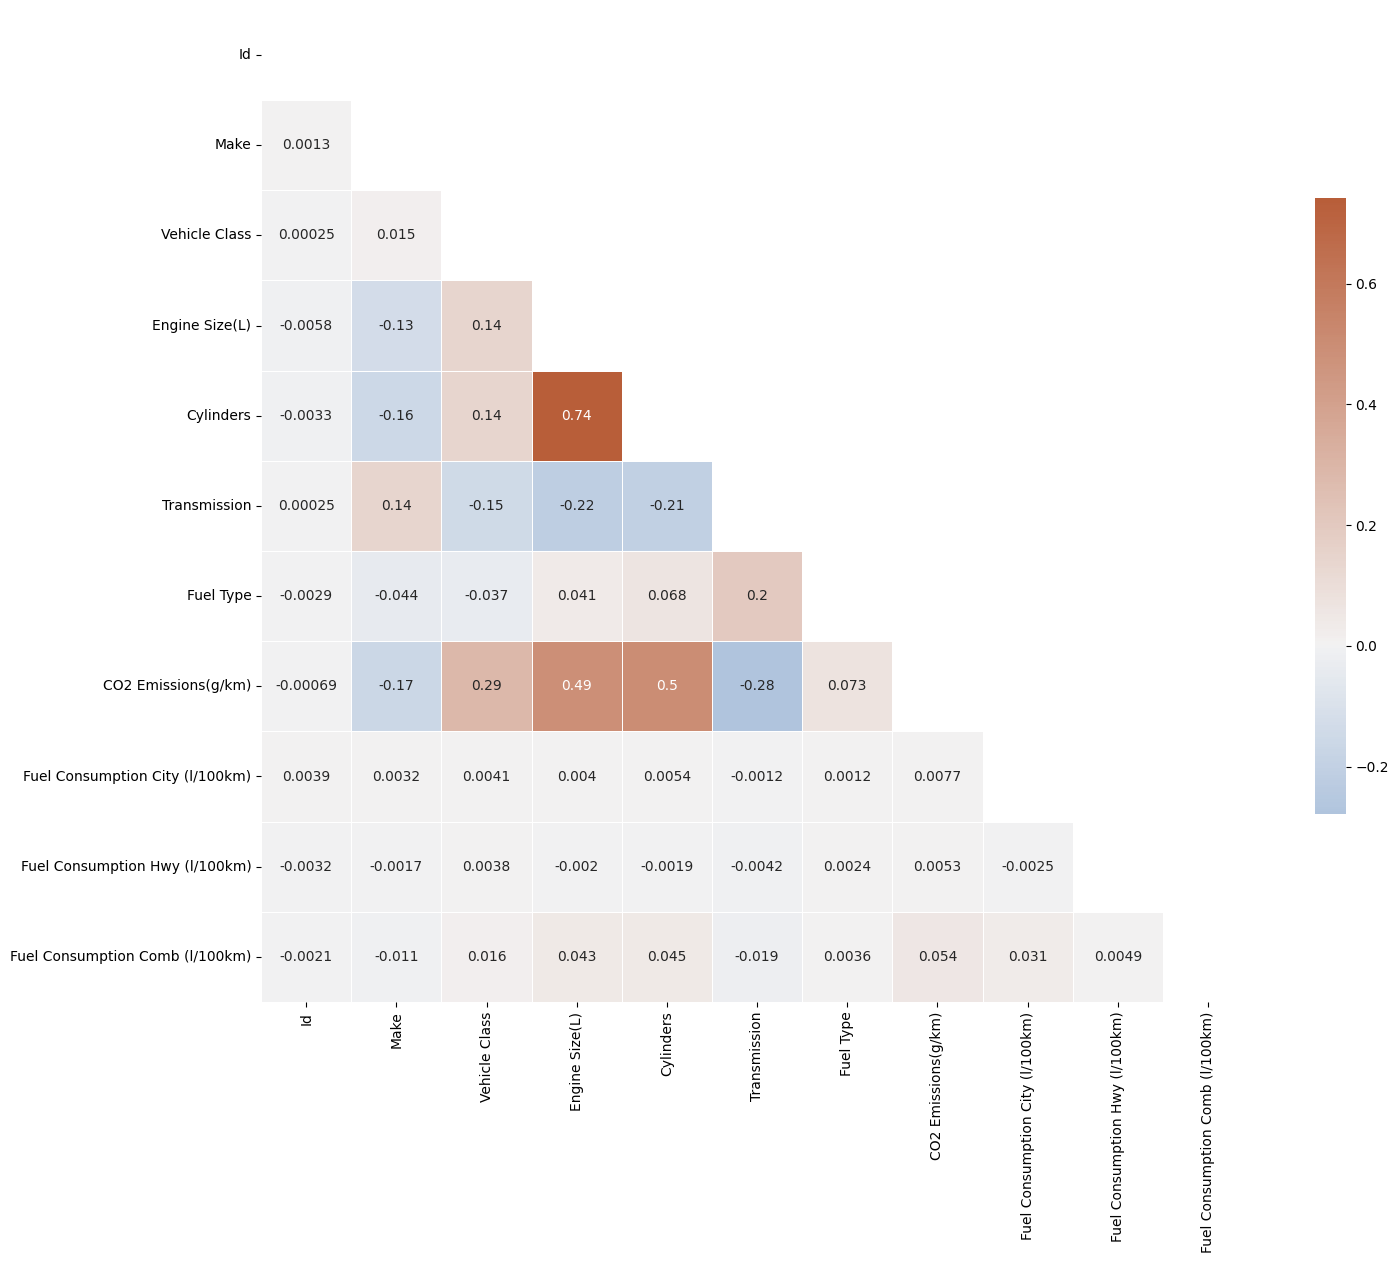

In [218]:
corr = train_encoded.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool_))
f, ax = plt.subplots(figsize=(16,16))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0, square=True, annot=True, linewidths=0.5, cbar_kws={"shrink": 0.5})

<Axes: >

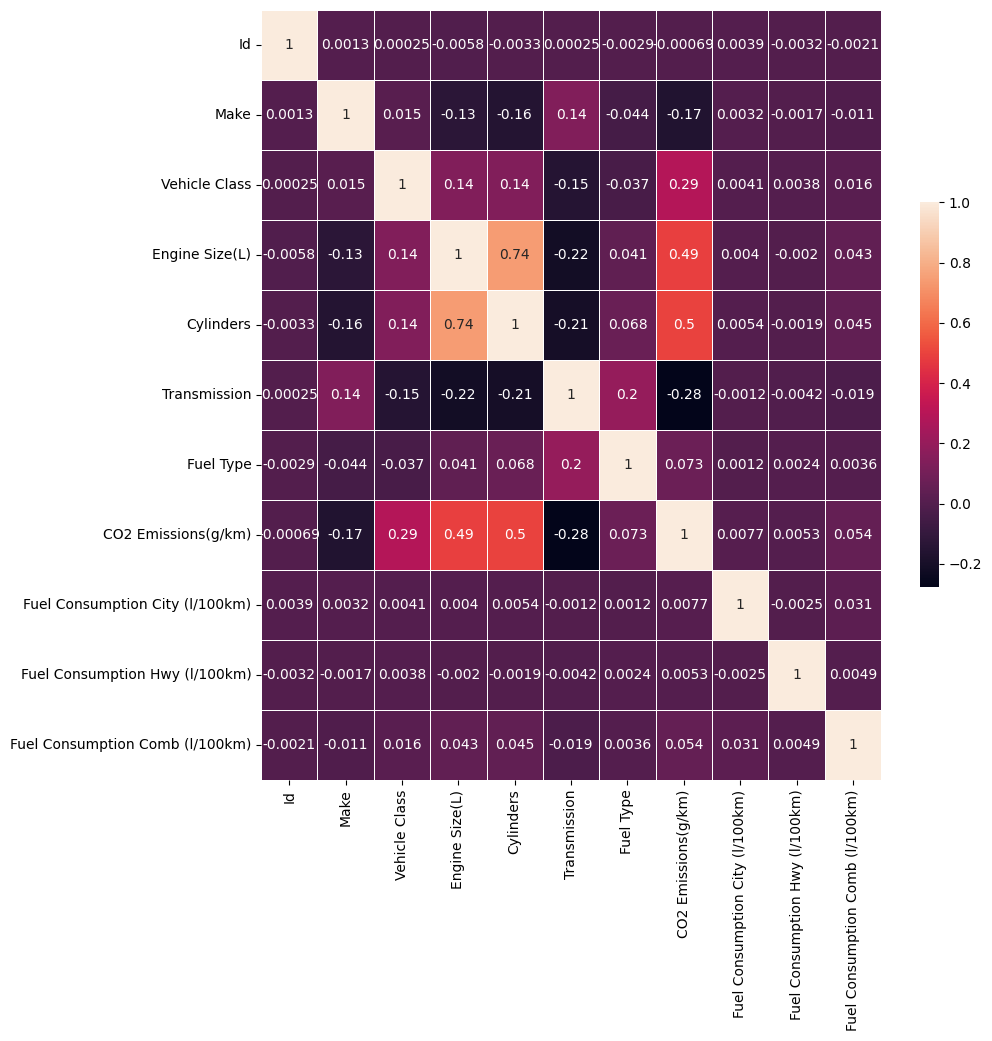

In [219]:
corr = train_encoded.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, linewidths=0.5, cbar_kws={"shrink": 0.5})

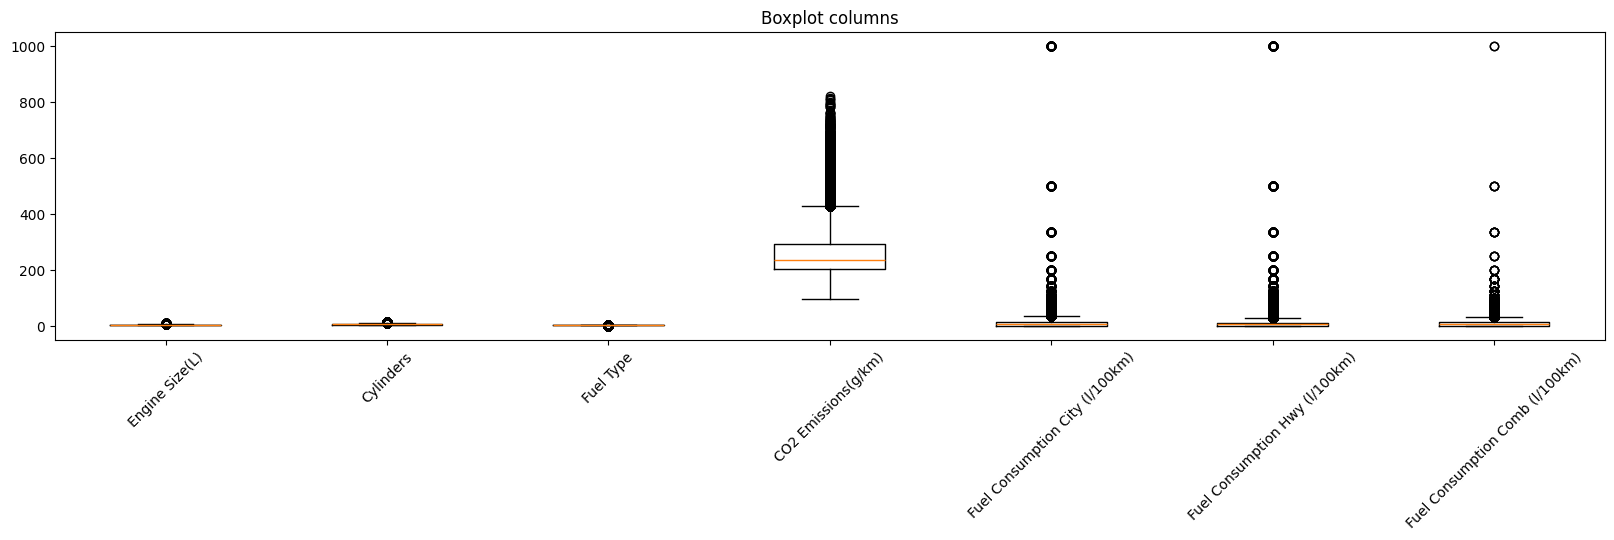

In [220]:
# Boxplot IQR to visualize outliers
def visualize_outliers(df):
    exclude_cols = ['Make', 'Vehicle Class', 'Transmission', 'Id']
    cols_to_plot = [col for col in df.columns if col not in exclude_cols]
    data_to_plot = [df[col].dropna().values for col in cols_to_plot]

    plt.figure(figsize=(20, 4))
    plt.boxplot(x=data_to_plot, labels=cols_to_plot)
    plt.title("Boxplot columns")
    plt.xticks(rotation=45)
    plt.show()
    

visualize_outliers(train_encoded)

In [251]:
def impute_outliers(df, cols, method='mode'):
    df_subset = df.drop(columns=cols)

    # Calculate IQR
    Q1 = df_subset.quantile(0.25)
    Q3 = df_subset.quantile(0.75)
    IQR = Q3 - Q1

    # Identify and replace outliers with the mode
    for col in df_subset.columns:
        lower_bound = Q1[col] - 1.5 * IQR[col]
        upper_bound = Q3[col] + 1.5 * IQR[col]

        if method == 'mode':
            replace_method = df_subset[col].mode()[0]
        elif method == 'mean':
            replace_method = df_subset[col].mean()
        else:
            replace_method = df_subset[col].median()

        # Replace outliers with the mode
        df_subset[col] = np.where((df_subset[col] < lower_bound) | (df_subset[col] > upper_bound),
                                    replace_method,
                                    df_subset[col])

    # Concatenate 'id' and 'make' columns back to the modified DataFrame
    modified_df = pd.concat([df[cols], df_subset], axis=1)
    
    return modified_df


train_imputed = impute_outliers(train_encoded, ['Make', 'Vehicle Class', 'Transmission', 'Id', 'CO2 Emissions(g/km)'])

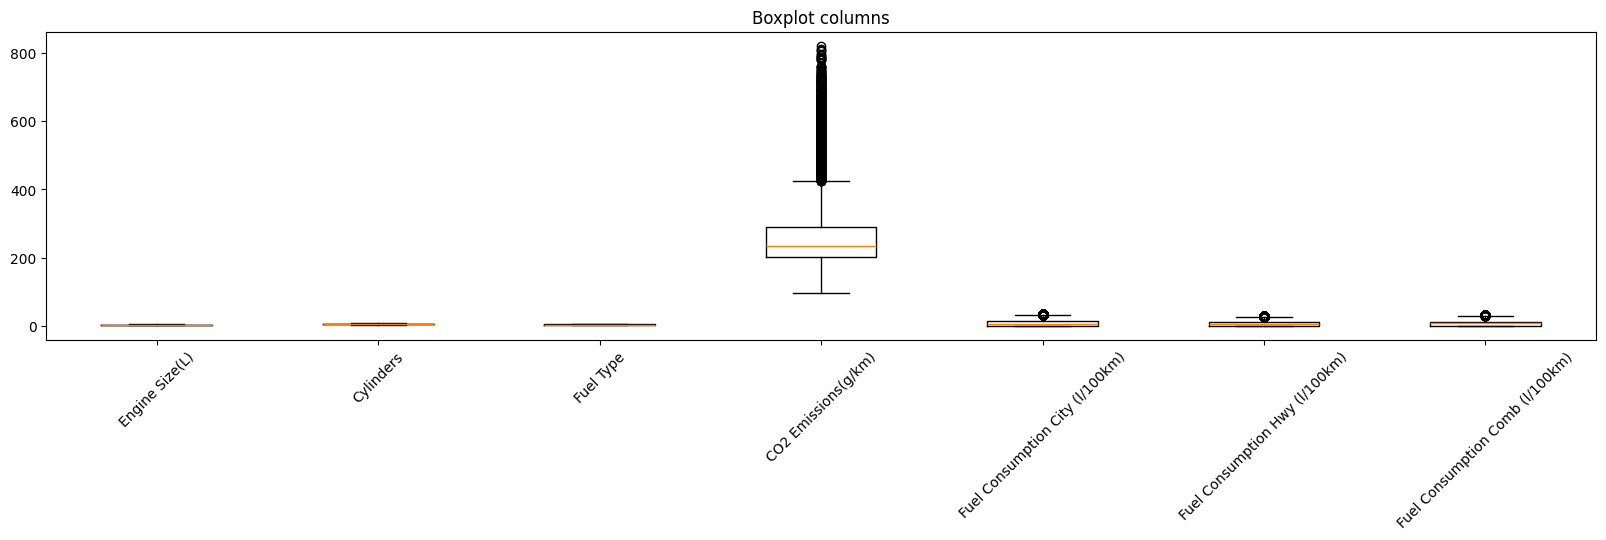

In [246]:
visualize_outliers(train_imputed)

In [223]:
train_imputed.shape

(137141, 11)

In [224]:
train_imputed.dtypes

Make                                 int64
Vehicle Class                        int64
Transmission                         int64
Id                                   int64
CO2 Emissions(g/km)                float64
Engine Size(L)                     float64
Cylinders                          float64
Fuel Type                          float64
Fuel Consumption City (l/100km)    float64
Fuel Consumption Hwy (l/100km)     float64
Fuel Consumption Comb (l/100km)    float64
dtype: object

In [225]:
# # Feature Selection

# # Standardize data
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler
# r_scaler = MinMaxScaler()
# r_scaler.fit(train)
# modified_data = pd.DataFrame(r_scaler.transform(train), index=train.index, columns=train.columns)

# # Filtering method (chi-square value)
# from sklearn.feature_selection import SelectKBest, chi2
# X = modified_data.loc[:, modified_data.columns != 'CO2 Emissions(g/km)']
# y = modified_data[['CO2 Emissions(g/km)']]
# selector = SelectKBest(chi2, k=10)
# selector.fit(X, y)
# X_new = selector.transform(X)
# print(X.columns[selector.get_support(indices=True)])

In [277]:
# Scaler
from sklearn.preprocessing import StandardScaler

def normalize(df, exclude_cols):
    df_exclude = df.drop(columns=exclude_cols, axis=1)
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df_exclude), index=df_exclude.index, columns=df_exclude.columns)
    
    return pd.concat([df_scaled, df[exclude_cols]], axis=1)

In [226]:
# Simpan preprocessed data
import pickle
import os

def save_processed_data(df, filename):
    if not os.path.exists('../data/processed'):
        os.makedirs('../data/processed')

    with open(f'../data/processed/{filename}.pkl', 'wb') as f:
        pickle.dump(df, f)

In [233]:
processed_data = train.copy()

processed_data = similarize_missing_values(processed_data)
city, hwy, comb = split_number_unit(processed_data)
processed_data = convert_fuel_consumption(processed_data, city, hwy, comb)

cleaned_data = fill_missval_fuel(processed_data)
# cleaned_data = fill_missval_categorical(cleaned_data)
# cleaned_data = fill_missval_num(cleaned_data)
# encoded_data = encode_categorical(cleaned_data)

modified_data = col_to_numeric(cleaned_data, ['Engine Size(L)', 'Cylinders'])
imputed_data = impute_nan(modified_data, ['Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type'])

In [252]:
imputed_outlier_data = impute_outliers(imputed_data, ['Make', 'Vehicle Class', 'Transmission', 'Id'], 'median')

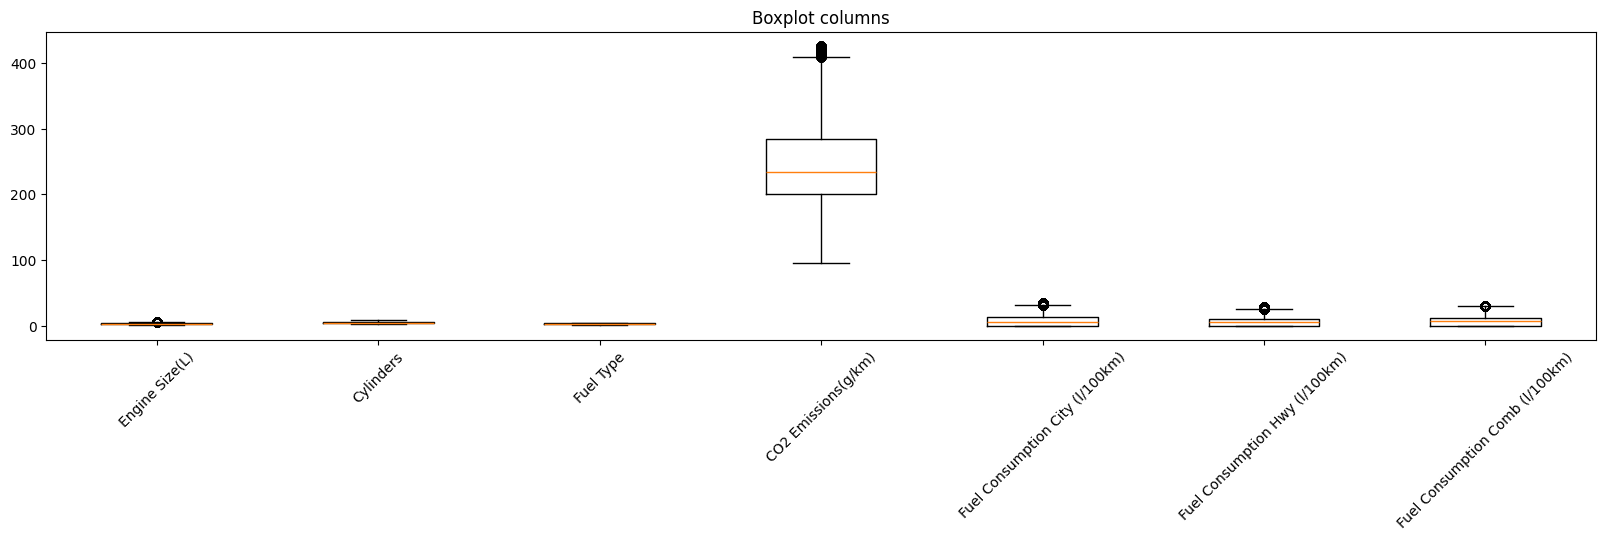

In [253]:
visualize_outliers(imputed_outlier_data)

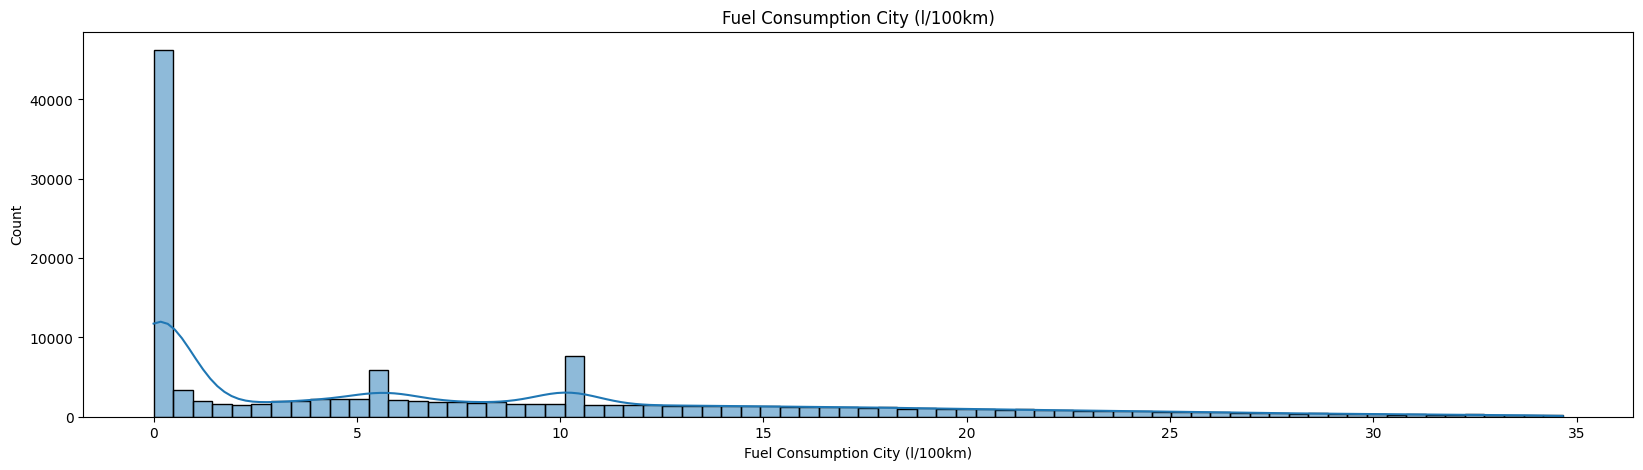

In [254]:
visualize_dist(imputed_outlier_data['Fuel Consumption City (l/100km)'])

In [284]:
encode_data = encode_categorical(imputed_outlier_data, ['Make'])
normal_data = normalize(encode_data, ['Id', 'Make', 'Vehicle Class', 'Transmission', 'Fuel Type', 'CO2 Emissions(g/km)'])

save_processed_data(normal_data, 'train-processed-v2.1')

In [257]:
test = pd.read_csv('../data/raw/test.csv')

ts_processed_data = test.copy()

ts_processed_data = similarize_missing_values(ts_processed_data)
city, hwy, comb = split_number_unit(ts_processed_data)
ts_processed_data = convert_fuel_consumption(ts_processed_data, city, hwy, comb)

ts_cleaned_data = fill_missval_fuel(ts_processed_data)
# ts_cleaned_data = fill_missval_categorical(ts_cleaned_data)
# ts_cleaned_data = fill_missval_num(ts_cleaned_data)
# encoded_data = encode_categorical(ts_cleaned_data)

ts_modified_data = col_to_numeric(ts_cleaned_data, ['Engine Size(L)', 'Cylinders'])
ts_imputed_data = impute_nan(ts_modified_data, ['Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type'])

ts_imputed_outlier_data = impute_outliers(ts_imputed_data, ['Make', 'Vehicle Class', 'Transmission', 'Id'], 'median')

In [282]:
ts_encode_data = encode_categorical(ts_imputed_data, ['Make'])
ts_normal_data = normalize(ts_encode_data, ['Id', 'Make', 'Vehicle Class', 'Transmission', 'Fuel Type'])

save_processed_data(ts_normal_data, 'test-processed-v2.1')